In [91]:
pwd

'/content/gdrive/My Drive/Colab Notebooks/NewData'

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd './gdrive/My Drive/Colab Notebooks/NewData'

/content/gdrive/My Drive/Colab Notebooks/NewData


In [0]:
import numpy as np
import torch as torch
import torch.nn as nn
import torch.nn.functional as F 
import torchvision 
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline
from torch import optim as opt
from torch.autograd import Variable


In [0]:

transform= transforms.Compose([
                 # transforms.CenterCrop(128),
                  # transforms.Scale(64),
                   transforms.ToTensor(),
                   transforms.Normalize((.5,),(.5,))
    
    
                   ])
dataset=datasets.MNIST(
            root="./NewData/",
            download=True,
            train=True,
            transform=transform 
          )




In [94]:
dataloader=torch.utils.data.DataLoader(dataset,shuffle=True,batch_size=64,num_workers=2)
dataiter=iter(dataloader)
imgs,_=next(dataiter)
print(imgs.size())


torch.Size([64, 1, 28, 28])


torch.Size([3, 242, 242])


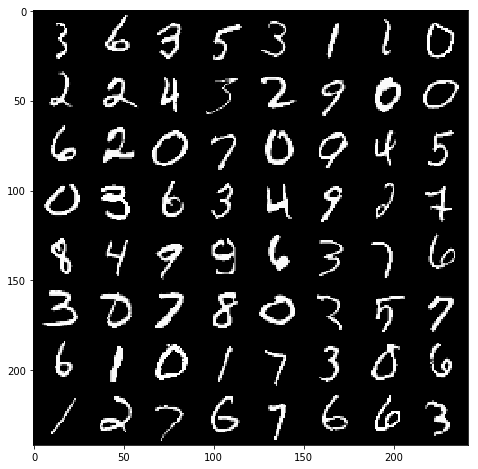

In [95]:
def imshow(imgs):
    imgs=torchvision.utils.make_grid(imgs)
    print(imgs.size())
    npimg=imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(imgs,(1,2,0)))
    
imshow(imgs)

In [0]:
bs=64,
Z=100,


In [0]:
def weight(m):
    classname=m.__class__.__name__
    if classname.find("Conv")!=-1:
        nn.init.normal_(m.weight.data,0,0.02)
    if classname.find("BatchNorm")!=-1:
        nn.init.normal_(m.weight.data,1,.02)
        nn.init.normal_(m.bias.data,0)

In [0]:
def to_var(x):
    if torch.cuda.is_available():#utilize the gpu of the pc
        x = x.cuda()
    return Variable(x)

def denorm(x): #It used to restrict a value to a given range.
    out = (x + 1) / 2
    return out.clamp(0, 1)

In [0]:
class genretor(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
                  
                  nn.ConvTranspose2d(100,512,4,1,0,bias=False),
                  nn.BatchNorm2d(512),
                  nn.ReLU(True),
                  nn.ConvTranspose2d(512,256,4,2,1,bias=False),
                  nn.BatchNorm2d(256),
                  nn.ReLU(True),
                  nn.ConvTranspose2d(256,128,4,2,1,bias=False),
                  nn.BatchNorm2d(128),
                  nn.ReLU(True),
                  nn.ConvTranspose2d(128,1,4,2,3,bias=False),
                  nn.Tanh()
         )
           
    def forward(self,input):
        return self.model(input)
        

   

In [100]:
G=genretor()
G.apply(weight)
noise=torch.randn(64,100,1,1)
print(G(noise).size())
print(G)

torch.Size([64, 1, 28, 28])
genretor(
  (model): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
    (9): ConvTranspose2d(128, 1, kernel_size=(4, 4), stride=(2, 2), padding=(3, 3), bias=False)
    (10): Tanh()
  )
)


In [0]:
class dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
                nn.Conv2d(1,128,4,2,1,bias=False),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(.2),
                nn.Conv2d(128,256,4,2,1,bias=False),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(.2),
                nn.Conv2d(256,512,3,2,1,bias=False),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(.2),
                nn.Conv2d(512,1,4,1,0,bias=False),
                nn.Sigmoid()
            
            )
           
    def forward(self,input):
        return self.model(input)

        

In [102]:
D=dis()
D.apply(weight)
print(D(imgs).view(-1).size())
print(D)
print(to_var(torch.ones(bs)).size())

torch.Size([64])
dis(
  (model): Sequential(
    (0): Conv2d(1, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2)
    (9): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (10): Sigmoid()
  )
)
torch.Size([64])


In [0]:
if torch.cuda.is_available():
    D.cuda()
    G.cuda()

In [0]:
beta1=.5
optimizer_D=opt.Adam(D.parameters(),lr=.0002,betas=(beta1, 0.999))
optimizer_G=opt.Adam(G.parameters(),lr=.0002,betas=(beta1, 0.999))
criterion = nn.BCELoss()

Epochi=0,G_loss=2.9906174051148424,D_loss=0.658278630597632
torch.Size([3, 122, 242])


Epochi=1,G_loss=2.285347312950948,D_loss=0.693016118967711
torch.Size([3, 122, 242])


Epochi=2,G_loss=2.4783419893462777,D_loss=0.6135874212518938
torch.Size([3, 122, 242])


Epochi=3,G_loss=2.535653817739441,D_loss=0.6149278341580048
torch.Size([3, 122, 242])


Epochi=4,G_loss=2.6383010301389485,D_loss=0.5995076001802487
torch.Size([3, 122, 242])


Epochi=5,G_loss=2.7624306512603374,D_loss=0.5726910795547815
torch.Size([3, 122, 242])


Epochi=6,G_loss=2.818332434749044,D_loss=0.5640441205169855
torch.Size([3, 122, 242])


Epochi=7,G_loss=2.960075223385525,D_loss=0.5058845304159213
torch.Size([3, 122, 242])


Epochi=8,G_loss=2.97364100468343,D_loss=0.5246747581879976
torch.Size([3, 122, 242])


Epochi=9,G_loss=3.1528743770696335,D_loss=0.46276611698144027
torch.Size([3, 122, 242])


Epochi=10,G_loss=3.1653981685225387,D_loss=0.47570667770911634
torch.Size([3, 122, 242])


Epochi=11,G_loss=3.2047600130568434,D_loss=0.49157419635542926
torch.Size([3, 122, 242])


Epochi=12,G_loss=3.2548908961833574,D_loss=0.47202932154700195
torch.Size([3, 122, 242])


Epochi=13,G_loss=3.3261333699943796,D_loss=0.4177040850588762
torch.Size([3, 122, 242])


Epochi=14,G_loss=3.389232531630758,D_loss=0.4539063782024104
torch.Size([3, 122, 242])


Epochi=15,G_loss=3.4165219694121816,D_loss=0.42839730716050306
torch.Size([3, 122, 242])


Epochi=16,G_loss=3.4278072447204258,D_loss=0.4303481967043457
torch.Size([3, 122, 242])


Epochi=17,G_loss=3.4682836504315517,D_loss=0.4399347703006349
torch.Size([3, 122, 242])


Epochi=18,G_loss=3.5019452580923973,D_loss=0.43357787615677185
torch.Size([3, 122, 242])


Epochi=19,G_loss=3.5022785449400544,D_loss=0.40998910211407935
torch.Size([3, 122, 242])


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Epochi=20,G_loss=3.5932827492607937,D_loss=0.40066354243215846
torch.Size([3, 122, 242])


Epochi=21,G_loss=3.5952787313189334,D_loss=0.39932433326742545
torch.Size([3, 122, 242])


Epochi=22,G_loss=3.6165543630329977,D_loss=0.3934618299846837
torch.Size([3, 122, 242])


Epochi=23,G_loss=3.640372042452841,D_loss=0.40419683324645705
torch.Size([3, 122, 242])


Epochi=24,G_loss=3.633514575784339,D_loss=0.4327704688029757
torch.Size([3, 122, 242])


Epochi=25,G_loss=3.740534065597093,D_loss=0.38915947805256096
torch.Size([3, 122, 242])


Epochi=26,G_loss=3.6843063620843495,D_loss=0.408272550606143
torch.Size([3, 122, 242])


Epochi=27,G_loss=3.705858705267469,D_loss=0.3967111325030451
torch.Size([3, 122, 242])


Epochi=28,G_loss=3.7845885471971052,D_loss=0.3800970463951958
torch.Size([3, 122, 242])


Epochi=29,G_loss=3.7598329422149512,D_loss=0.4089354652363354
torch.Size([3, 122, 242])


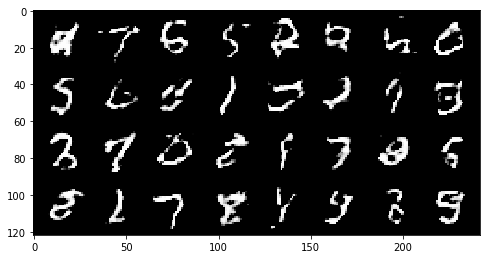

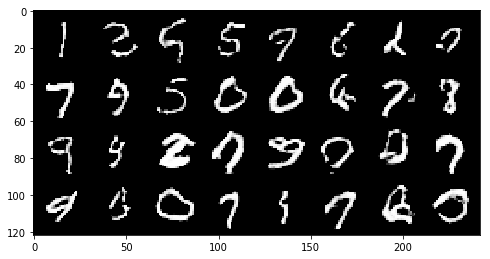

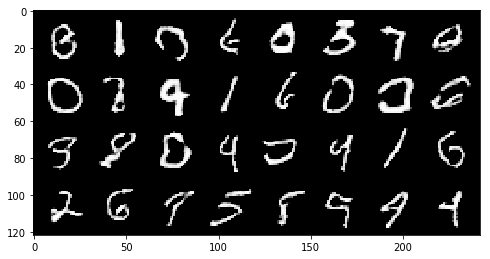

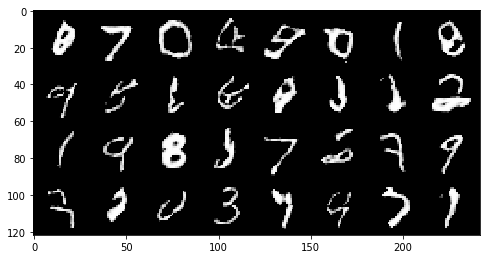

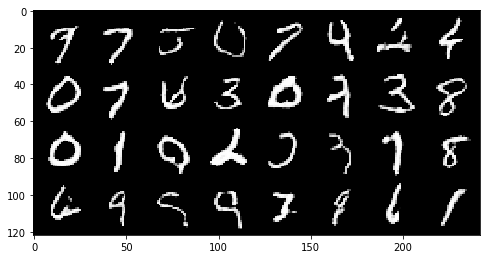

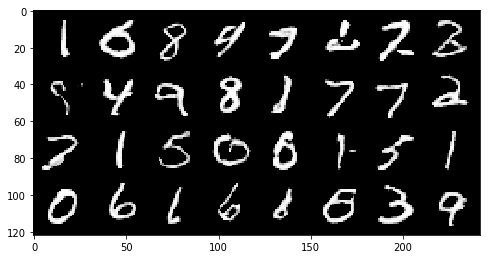

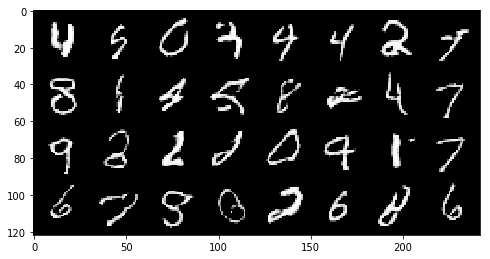

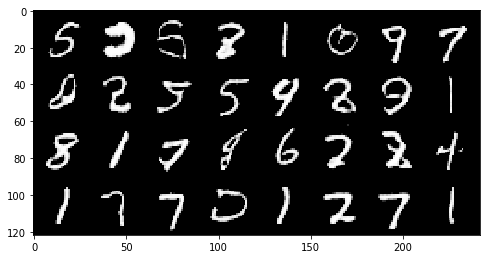

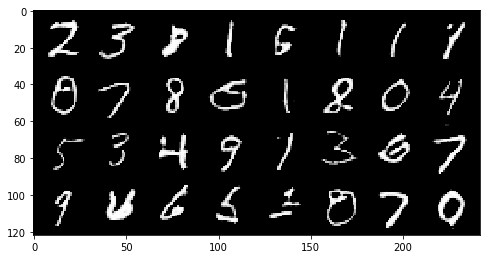

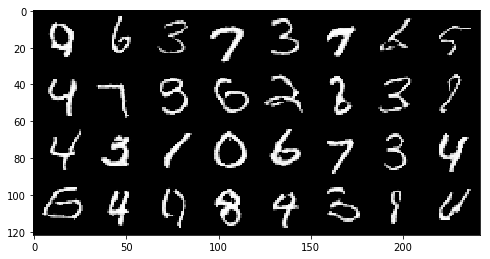

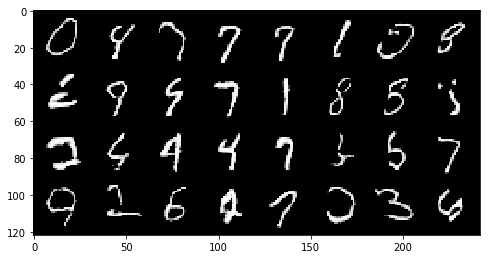

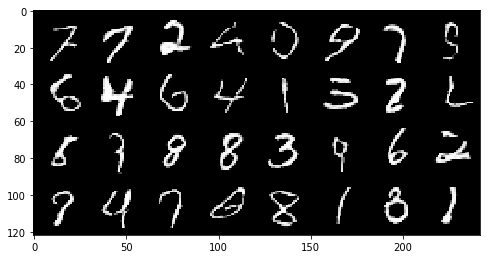

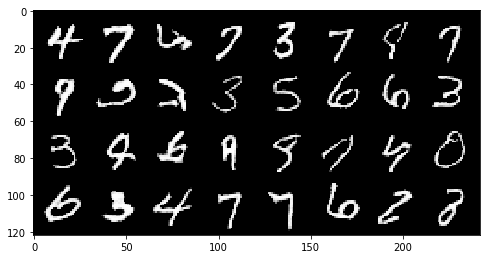

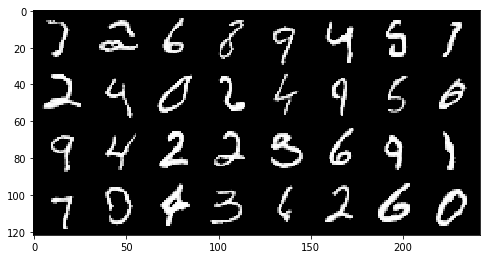

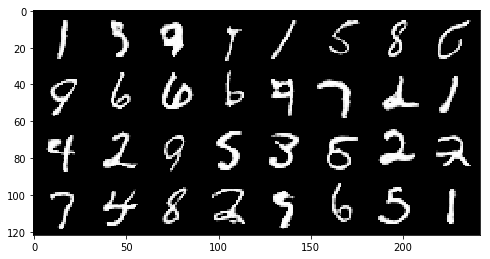

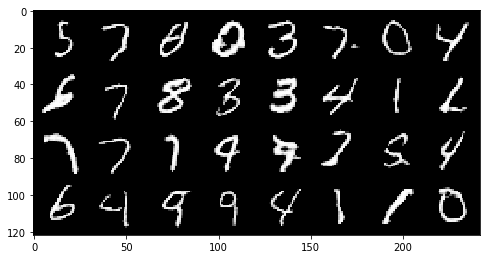

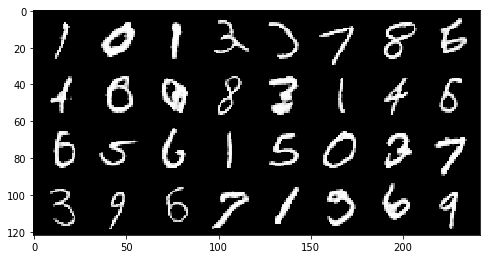

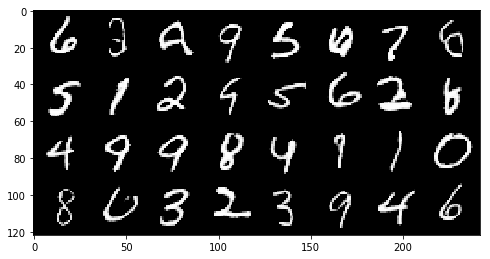

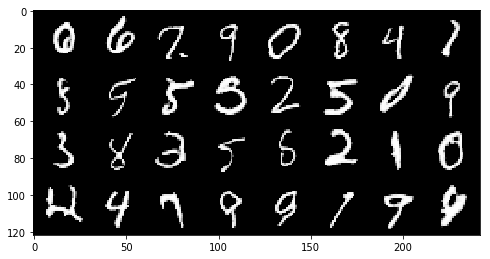

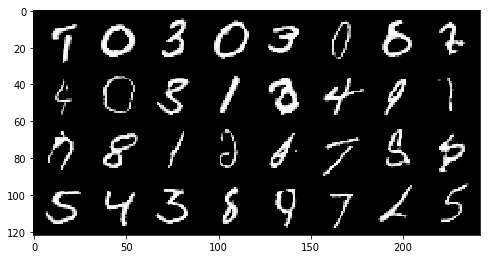

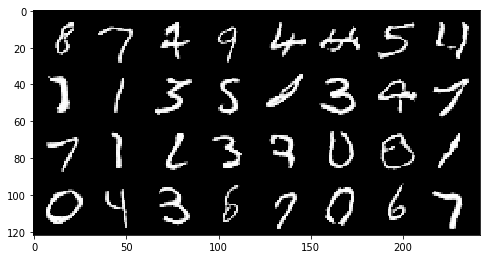

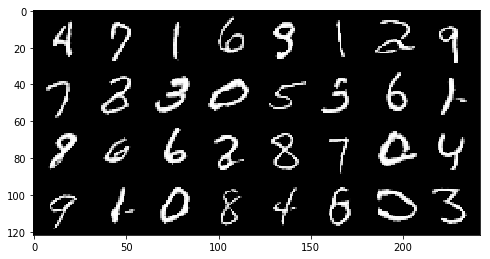

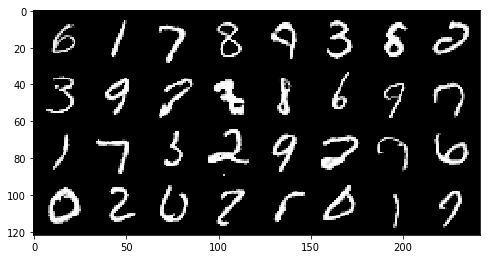

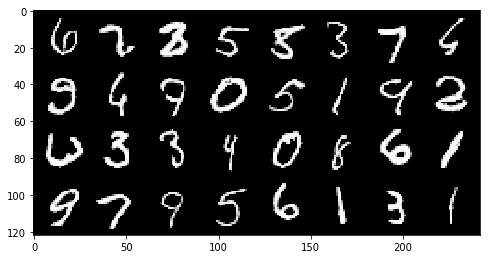

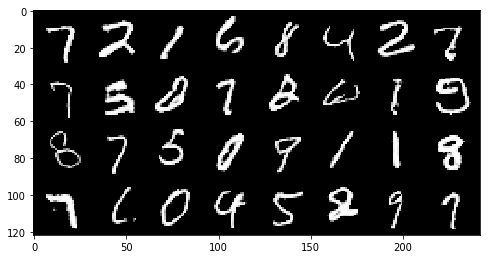

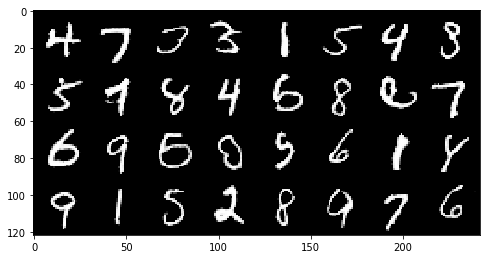

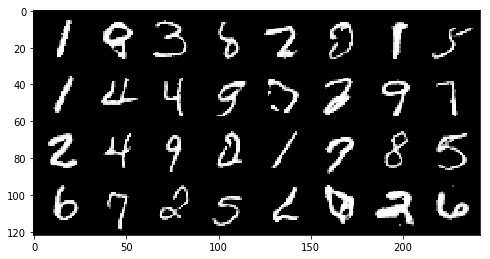

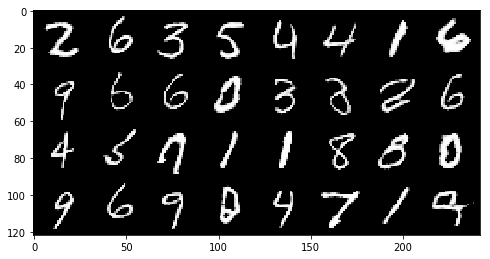

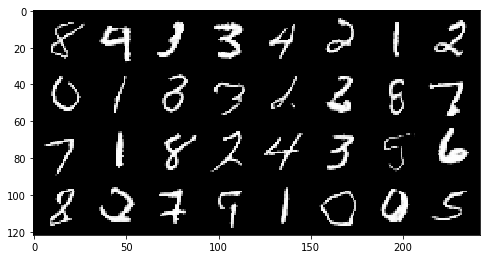

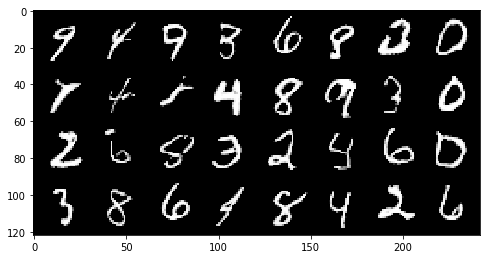

In [105]:
for epoch in range(30):
    G_loss_run=0.
    D_loss_run=0.
    for i,(images,_) in enumerate(dataloader):
              
              bs=images.size(0)
              
              
              images=to_var(images)
              z=to_var(torch.randn(bs,100,1,1))
              real_label=to_var(torch.ones(bs))
              fake_label=to_var(torch.zeros(bs))
              if torch.cuda.is_available():
                  D.cuda()
                  G.cuda()
      
              D.zero_grad()
            
              D_real=D(images).view(-1)
              D_real_loss=criterion(D_real,real_label)
              D_real_loss.backward()
              D_x = D_real.mean().item()
              
              fake=G(z)
              
              z=to_var(torch.randn(bs,100,1,1))
              D_fake=D(fake.detach()).view(-1)
              D_fake_loss=criterion(D_fake,fake_label)
              D_fake_loss.backward()
              D_G_z1 = D_real.mean().item()
              
              D_loss=D_real_loss+D_fake_loss
              
              optimizer_D.step()

              G.zero_grad()
              
              
              D_fake=D(fake).view(-1)
              G_loss=criterion(D_fake,real_label)
              
              
              G_loss.backward()
              optimizer_G.step()

              G_loss_run +=G_loss.item()
              D_loss_run +=D_loss.item()

    print("Epochi={},G_loss={},D_loss={}".format(epoch,G_loss_run/(i+1),D_loss_run/(i+1)))
    
    
    sample=G(z).detach() 
    sample=sample.cpu()
    imshow(sample)